<a href="https://colab.research.google.com/github/AryanMethil/Brain_Tumor_Detection/blob/master/Brain_Tumor_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
YES_1 = '/content/drive/MyDrive/Brain_Tumor_Classification/input/brain_tumor_dataset/yes/Image2779.jpg'
YES_2 = '/content/drive/MyDrive/Brain_Tumor_Classification/input/brain_tumor_dataset/yes/Image2822.jpg'

NO_1 = '/content/drive/MyDrive/Brain_Tumor_Classification/input/brain_tumor_dataset/no/46 no.jpg'
NO_2 = '/content/drive/MyDrive/Brain_Tumor_Classification/input/brain_tumor_dataset/no/N3.jpg'
NO_3= '/content/drive/MyDrive/Brain_Tumor_Classification/input/brain_tumor_dataset/no/no 10.jpg'

IMAGES = [YES_1, YES_2, NO_1, NO_2]

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


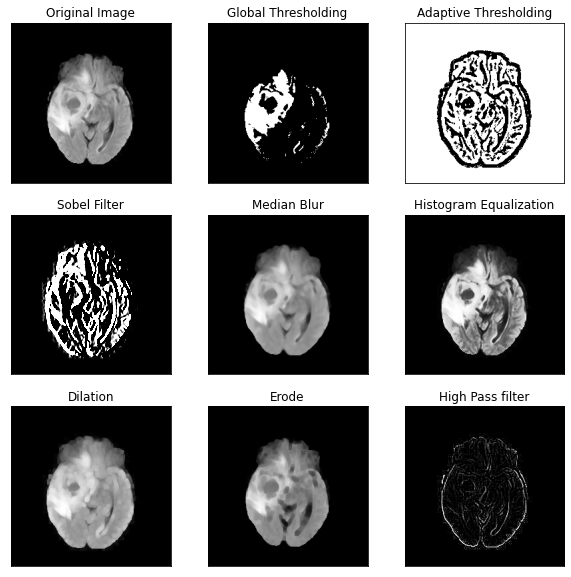

In [8]:
# Global thresh , adaptive thresh , Sobel , Median , Hist + Dilation + Erosion
# Sharpening + Hist + Erosion + Dilation , Hist , Erosion + Dilation

# def preprocessing()
img = cv.imread(YES_2)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_global_thresh, thresh1 = cv.threshold(img, 170, 255, cv.THRESH_BINARY)
img_adaptive_thresh = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
img_sobel = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
img_median = cv.medianBlur(img, 5)
img_hist = cv.equalizeHist(img)
img_dilate = cv.dilate(img, np.ones((4,4)), iterations=1)
img_erode = cv.erode(img, np.ones((4,4)),iterations=1)
img_sharpen = cv.filter2D(img, -1, np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]))


titles = ['Original Image','Global Thresholding','Adaptive Thresholding','Sobel Filter','Median Blur','Histogram Equalization','Dilation', 'Erode', 'High Pass filter']
images = [img, thresh1, img_adaptive_thresh, img_sobel, img_median, img_hist, img_dilate, img_erode, img_sharpen]
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    # plt.figure(figsize=(7,7))
    plt.xticks([]),plt.yticks([])
plt.show()

